### Let's run a simple image classifier, using the CIFAR 10 dataset of 10 image categories
* CIFAR's 10 categories:
 * airplane
 * automobile
 * bird
 * cat
 * deer
 * dog
 * frog
 * horse
 * ship
 * truck

In [1]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import load_model
import os


Using TensorFlow backend.


In [8]:
batch_size = 32
num_classes = 10
epochs = 5

#Load the CIFAR dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

#Display our data shape/dimension
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# Format our training data by Normalizing and changing data type
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train/=255
X_test/=255

#Now we do one hot encode output
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(64, (3, 3), padding = 'same',
                input_shape = X_train.shape[1:]))
model.add(Activation('relu'))
model.add(Dropout(0.25))
# model.add(Conv2D(64, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.35))

model.add(Conv2D(32, (3, 3), padding = 'same'))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.35))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

#initiate RMSprop optimizer and configure some parameter
opt = keras.optimizers.rmsprop(lr = 0.0001, decay=1e-6)

#let's create our model
model.compile(loss = 'categorical_crossentropy',
             optimizer = opt,
             metrics = ['accuracy'])
print(model.summary())

X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
activation_25 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 32, 32, 32)        18464     
_________________________________________________________________
activation_26 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 30, 30, 32)        9248      
_______________________________________________

**Training Our Model**

In [9]:
history = model.fit(X_train, y_train,
                   batch_size = batch_size,
                   epochs = epochs,
                   validation_data = (X_test, y_test),
                   shuffle = True)
model.save('cifar_simple_cnn_2.h5')

#Evaluate the performance of our trained model
scores = model.evaluate(X_test, y_test, verbose = 1)
print('Test Loss:', scores[0])
print('Test accuracy:', scores[1])

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
   64/50000 [..............................] - ETA: 8:37:37 - loss: 2.3607 - accuracy: 0.0781 

/home/pankaj/.local/lib/python3.6/site-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (1.591547). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


50000/50000 [==============================] - 565s 11ms/step - loss: 1.7458 - accuracy: 0.3707 - val_loss: 1.5312 - val_accuracy: 0.4601
Epoch 2/5
50000/50000 [==============================] - 483s 10ms/step - loss: 1.4291 - accuracy: 0.4888 - val_loss: 1.2980 - val_accuracy: 0.5456
Epoch 3/5
50000/50000 [==============================] - 557s 11ms/step - loss: 1.2718 - accuracy: 0.5489 - val_loss: 1.1816 - val_accuracy: 0.5850
Epoch 4/5
50000/50000 [==============================] - 582s 12ms/step - loss: 1.1759 - accuracy: 0.5843 - val_loss: 1.0946 - val_accuracy: 0.6136
Epoch 5/5
10000/10000 [==============================] - 21s 2ms/step
Test Loss: 1.0496354249954223
Test accuracy: 0.6327000260353088


**Plotting our Accuracy and Loss Charts**

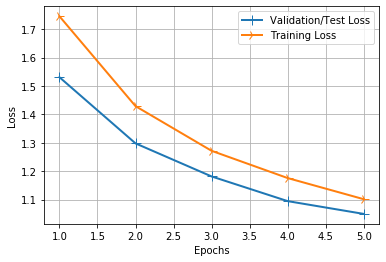

In [12]:
import matplotlib.pyplot as plt
history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) +1)

line1 = plt.plot(epochs, val_loss_values, label= 'Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label = 'Training Loss')
plt.setp(line1, linewidth = 2.0, marker = '+', markersize = 10.0)
plt.setp(line2, linewidth = 2.0, marker = '4', markersize = 10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

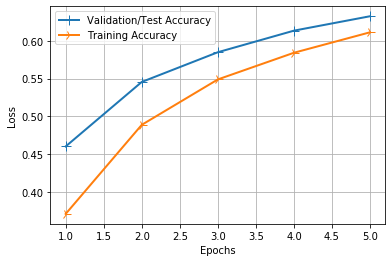

In [11]:
import matplotlib.pyplot as plt
history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) +1)

line1 = plt.plot(epochs, val_acc_values, label = 'Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label = 'Training Accuracy')
plt.setp(line1, linewidth = 2.0, marker = '+', markersize = 10.0)
plt.setp(line2, linewidth = 2.0, marker = '4', markersize = 10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

**Let's run some tests**

In [13]:
import cv2
import numpy as np
from keras.models import load_model

img_row, img_height, img_depth = 32,32,3
classifier = load_model('cifar_simple_cnn_2.h5')
color = True
scale = 8

def draw_test(name, res, input_im, scale, img_row, img_height):
    BLACK = [0,0,0]
    res = int(res)
    if res == 0:
        pred = 'airplane'
    if res == 1:
        pred = 'automobile'
    if res == 2:
        pred = 'bird'
    if res == 3:
        pred = 'cat'
    if res == 4:
        pred = 'deer'
    if res == 5:
        pred = 'dog'
    if res == 6:
        pred = 'frog'
    if res == 7:
        pred = 'horse'
    if res == 8:
        pred = 'ship'
    if res == 9:
        pred = 'truck'
        
    expanded_image = cv2.copyMakeBorder(input_im, 0,0,0, imageL.shape[0]*2, cv2.BORDER_CONSTANT, value = BLACK)
    if color == False:
        expanded_image = cv2.cvtColor(expanded_image, cv2.COLOR_GRAY2BGR)
    cv2.putText(expanded_image, str(pred), (300, 80), cv2.FONT_HERSHEY_COMPLEX_SMALL, 3, (0, 255, 0), 2)
    cv2.imshow(name, expanded_image)
    
for i in range(0, 10):
    rand = np.random.randint(0, len(X_test))
    input_im = X_test[rand]
    imageL = cv2.resize(input_im, None, fx = scale, fy = scale, interpolation = cv2.INTER_CUBIC)
    input_im = input_im.reshape(1, img_row, img_height, img_depth)
    
    #Get Prediction
    res = str(classifier.predict_classes(input_im, 1, verbose =0)[0])
    
    draw_test('Prediction', res, imageL, scale, img_row, img_height)
    cv2.waitKey(0)

cv2.destroyAllWindows()